
# Uma breve introdução ao Machine Learning: Dia 2

Gabriel Wendell Celestino Rocha

Material de um minicurso de introdução ao Machine Learning oferecido pelo [PET - Física](https://petfisica.home.blog).

O conteúdo é mantido no [GitHub](https://github.com/GabrielWendell/Intro_ML) e distribuídos sob uma [licença BSD3](https://opensource.org/licenses/BSD-3-Clause).

- [Veja a tabela de conteúdos](https://github.com/GabrielWendell/Intro_ML/blob/main/Infomações/Conteúdos.ipynb)

Este `Notebook` pode, opcionalmente, ser visto como uma [apresentação de slides](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f). Para apresentar os slides localmente, use:

```Python
$ jupyter nbconvert Dia2.ipynb --to slides --post serve
```

---

### Bibliotecas necessárias

In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length = 5,width = 1,labelsize = 15)
    plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length = 8,width = 1,labelsize = 15)

### Versões das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Pandas, Seaborn

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19043
Matplotlib 3.5.1
Numpy 1.22.2
Pandas 1.4.0
Seaborn 0.11.2
Tue Jul 05 20:26:51 2022 Hora Padrão de Buenos Aires

#### Instalação:

```
$ pip install version_information
```

---

# Computação Tensorial

A maioria dos algoritmos práticos de ML podem ser decompostos em pequenos passos onde os cálculos são expressos com álgebra linear, ou seja, combinações lineares de escalares, vetores e matrizes.

Por exemplo, uma rede neural pode ser construída a partir de camadas onde cada uma calcula

$$\textbf{x}_{\text{out}}=\max{(0,W\textbf{x}_{\text{in}}+\textbf{b})}$$

onde $W$ é uma matriz e os símbolos em negrito representam vetores. Em aplicações típicas, $\textbf{x}_{\text{out}}$ e $\textbf{x}_{\text{in}}$ são derivados de **dados** enquanto $W$ e $\textbf{b}$ são considerados **parâmetros do modelo**. (Essa relação não é estritamente linear: por quê?)

Os tipos numéricos e de lista python podem representar escalares arbitrários, vetores e matrizes, mas são projetados para flexibilidade em vez de eficiência.

O Numpy é otimizado para o caso especial em que todos os elementos da lista são valores numéricos do mesmo tipo, que podem ser organizados e acessados de forma muito eficiente na memória, com um tipo de array especializado com muitos recursos interessantes. Uma desvantagem dessa abordagem é que a maioria das funções matemáticas internas são duplicadas (por exemplo, `math.sin` e `np.sin`) para trabalhar com matrizes Numpy.

## 1. Terminologia

Frequentemente usamos $\textbf{r}=(x,y,z)$ em física para representar uma posição arbitrária em três dimensões (contínuas).

Em numpy, não podemos representar uma posição arbitrária, mas podemos representar facilmente uma posição *específica*, por exemplo:

In [3]:
rvec = np.array([0.1, -0.2, 0.3])
rvec[0], rvec[1], rvec[2]

(0.1, -0.2, 0.3)

No entanto, `rvec` tem apenas uma dimensão (discreta), que usamos para acessar seus três elementos de array com índices 0,1,2:

Observe como usamos o termo **dimensão** de maneira diferente nesses dois casos!

Todos os arrays numpy têm uma propriedade shape que especifica o intervalo de índices permitidos para cada uma de suas dimensões (discretas):

In [4]:
print(rvec.shape)
print(rvec.ndim)

(3,)
1


Compare com uma matriz representada em numpy:

In [5]:
matrix = np.identity(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
matrix[1, 0], matrix[1, 1]

(0.0, 1.0)

In [7]:
print(matrix.shape)
print(matrix.ndim)

(3, 3)
2


Numpy suporta arrays com qualquer número (finito) de dimensões (discretas). O nome geral para esses arrays é um **tensor** (portanto, escalares, vetores e matrizes são tensores). Por exemplo:

In [8]:
tensor = np.ones((2, 3, 4))
print(tensor)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [9]:
tensor[0, 0, 0], tensor[1, 2, 3]

(1.0, 1.0)

In [10]:
print(tensor.shape)
print(tensor.ndim)

(2, 3, 4)
3


Tensores também são usados em física: por exemplo, a expressão tensorial $g^{i\ell}\Gamma_{ki}^{k}x^{k}$ surge em [derivadas contravariantes na Relatividade Geral](https://en.wikipedia.org/wiki/Christoffel_symbols#Covariant_derivatives_of_tensors). Quais são as dimensões de , e nesta expressão? Observe que os tensores numpy não fazem distinção entre índices superiores ou inferiores.

A dimensão numpy às vezes também é chamada de **posto** (*rank*) (mas observe que o [posto do array](https://en.wikipedia.org/wiki/Rank_(computer_programming)) é semelhante, mas sutilmente diferente da [posto da álgebra linear](https://en.wikipedia.org/wiki/Rank_(linear_algebra)).

## 2. Operações fundamentais

### 2.1 Criação de tensores

As maneiras mais comuns de criar novos arrays são:

- Preenchido com uma sequência simples de valores constantes
- Preenchido com valores aleatórios (reprodutíveis)
- Calculado como uma função matemática de matrizes existentes.

1. Sequência regular de valores:

In [11]:
shape = (3, 4)
c1 = np.zeros(shape)
c2 = np.ones(shape)
c3 = np.full(shape, -1)
c4 = np.arange(12)

print(c3)

[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


2. Números "aleatórios" reproduzíveis:

In [12]:
gen = np.random.RandomState(seed = 123)
r1 = gen.uniform(size = shape)
r2 = gen.normal(loc = -1, scale = 2, size = shape)

print(r2)

[[-2.3577723  -1.18941794  1.98277925 -2.27780399]
 [-1.88796392 -1.86870255  3.41186017  3.37357218]
 [ 1.0081078  -0.2276272   0.47473715  1.98146406]]


3. Calculado em função do array existente:

In [13]:
f1 = r1 * np.sin(r2) ** c3
print(f1)

[[-0.98651393 -0.30828915  0.24756561 -0.72511937]
 [-0.75723804 -0.44260167 -3.67342209 -2.9787578 ]
 [ 0.56859575 -1.73759684  0.7507646   0.79516406]]


Todos os valores contidos em um tensor têm o mesmo [tipo de dados](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html), que você pode inspecionar:

In [14]:
c1.dtype, c4.dtype

(dtype('float64'), dtype('int32'))

Quais seriam os `dtype` de `c3`, `r2` e `f1`?

In [15]:
c3.dtype, r2.dtype, f1.dtype

(dtype('int32'), dtype('float64'), dtype('float64'))

Acontece que as funções `np.zeros` e `np.ones` do Numpy são do tipo `float64`, por padrão, enquanto a função `np.full` usa o tipo do valor constante fornecido. Os inteiros são promovidos automaticamente a `float`s em expressões mistas.

**PERGUNTA:** O aprendizado profundo (*deep learning*) geralmente usa tipos de dados flutuantes menores (32 bits ou 16 bits). Quais são as vantagens? E as desvantagens?

**RESPOSTA:** `Floats` menores permitem o uso mais eficiente da memória limitada (GPU) e cálculos mais rápidos, ao custo de alguma precisão que por sua vez pode ser "negociada". Como o treinamento de uma rede neural profunda é inerentemente barulhento, isso geralmente é uma boa compensação.

### 2.2 Remodelagem do tensor

Muitas vezes é útil remodelar um tensor sem alterar seu tamanho total, o que pode ser feito de forma muito eficiente através da função [`np.reshape`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.reshape.html) do Numpy, pois o layout dos valores do tensor na memória não precisa ser alterado:

In [16]:
c4.reshape(c1.shape)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
c4.reshape(2, 3, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

### 2.3 *Broadcasting* de tensores

O verdadeiro poder da computação tensorial vem de expressões como esta:

In [18]:
c4 + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Escalamos cada coluna da matriz de $3\times4$ unidades por um valor diferente.

In [19]:
np.ones(shape = (3, 4)) * np.arange(4)

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

Os resultados não são surpreendentes nesses exemplos, mas algo não trivial está acontecendo nos bastidores para fazer isso funcionar, já que estamos combinando tensores com formas diferentes. Isso se chama [*broadcasting*](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html) e tem regras específicas de como lidar com casos menos óbvios.

O *broadcasting* serve a dois propósitos:

- Permite expressões "vetorizadas" mais compactas e fáceis de entender, onde os loops sobre os elementos em cada dimensão estão implícitos.

- Permite otimizações automáticas para aproveitar o hardware disponível, já que loops python explícitos geralmente são um gargalo.

Nem todas as expressões podem ser transmitidas automaticamente, mesmo que pareçam fazer sentido. Por exemplo:

In [20]:
try:
    np.ones(shape = (3, 4) * np.arange(3))
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,) (3,) 


No entanto, geralmente você pode remodelar as entradas para obter o resultado desejado:

In [21]:
np.ones(shape = (3, 4)) * np.arange(3).reshape(3, 1)

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.]])

Outro truque útil é usar `keepdims = True` com funções de redução, como por exemplo:

In [22]:
print(np.ones((4, 3)).sum(axis = 1))
print(np.ones((4, 3)).sum(axis = 1, keepdims = True))

[3. 3. 3. 3.]
[[3.]
 [3.]
 [3.]
 [3.]]


Para experimentar as regras de transmissão, defina uma função para tentar transmitir duas formas de tensor arbitrárias:

In [23]:
def broadcast(shape1, shape2):
    array1 = np.ones(shape1)
    array2 = np.ones(shape2)
    try:
        array12 = array1 + array2
        print('Shapes {} {} broacast to {}'.format(shape1, shape2, array12.shape))
    except ValueError as e:
        print(e)

In [24]:
broadcast((1, 3), (3,))

Shapes (1, 3) (3,) broacast to (1, 3)


In [25]:
broadcast((1, 2), (3,))

operands could not be broadcast together with shapes (1,2) (3,) 


Podemos inclusive "brincar" de tentar adivinhar o resultado de algumas transmissões:

In [26]:
broadcast((3, 1, 2), (3, 2))
broadcast((2, 1, 3), (3, 2))
broadcast((3,), (2, 1))
broadcast((3,), (1, 2))
broadcast((3,), (1, 3))

Shapes (3, 1, 2) (3, 2) broacast to (3, 3, 2)
operands could not be broadcast together with shapes (2,1,3) (3,2) 
Shapes (3,) (2, 1) broacast to (2, 3)
operands could not be broadcast together with shapes (3,) (1,2) 
Shapes (3,) (1, 3) broacast to (1, 3)


## 3. Estrutura de tensores

### 3.1 Numpy

`Numpy` é um exemplo de uma estrutura para computação tensorial que é amplamente suportada e não requer hardware especial. No entanto, ele ainda oferece melhorias significativas de desempenho, eliminando loops python explícitos e usando a memória com eficiência.

Por exemplo, vamos calcular a separação do ângulo de abertura entre dois vetores unitários, cada um especificado com ângulos (`lat`, `lon`) em radianos (ou `RA`, `DEC` para astrônomos, conforme implementado [aqui](https://desisurvey.readthedocs.io/en/latest/api.html#desisurvey.utils.separation_matrix)). A [fórmula de Haversine](https://en.wikipedia.org/wiki/Haversine_formula) é uma boa maneira de calcular essa quantidade.

Gere um grande número de vetores unitários aleatórios para *benchmarking* (esses são distribuídos uniformemente na esfera?)

<IPython.core.display.Javascript object>


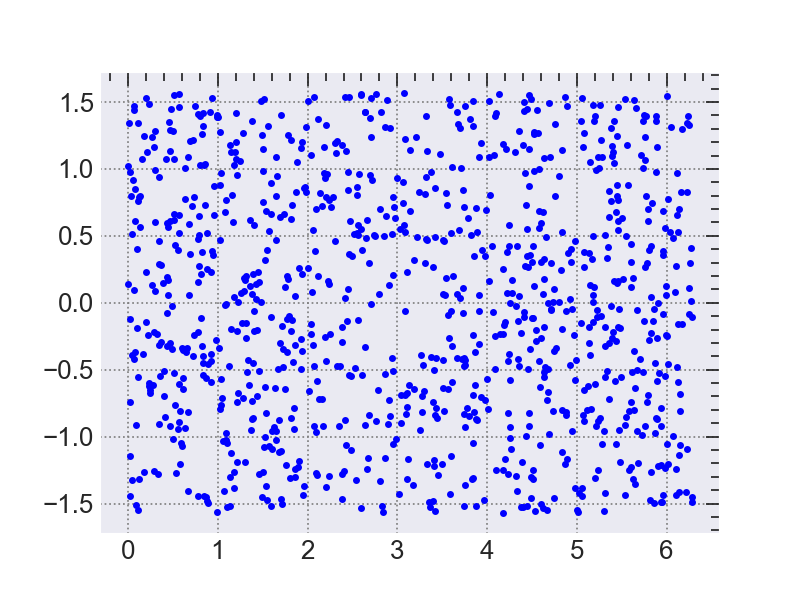

In [27]:
def generate(N, seed = 123):
    gen = np.random.RandomState(seed = 123)
    lats = gen.uniform(low = -np.pi/2, high = +np.pi/2, size = N)
    lons = gen.uniform(low = 0, high = 2* np.pi, size = N)
    plt.plot(lons, lats, '.', color = 'blue')
    opt_plot()
    
    return lats, lons

lats, lon = generate(N = 1000)

Usamos loops python explícitos para calcular a matriz (quadrada) de ângulos de separação entre todos os pares de vetores unitários:

In [28]:
def separation_matrix_loops():
    N = len(lats)
    matrix = np.empty((N, N))
    for i, (lat1, lon1) in enumerate(zip(lats, lon)):
        for j, (lat2, lon2) in enumerate(zip(lats, lon)): 
            matrix[i, j] = 2 * np.arcsin(np.sqrt(
                np.sin(0.5 * (lat2 - lat1)) ** 2 +
                np.cos(lat1) * np.cos(lat2) * np.sin(0.5 * (lon2 - lon1)) ** 2))
                                         
    return matrix

Usamos a *magic extension* `%time` para dar uma olhada no tempo necessário para rodar nossa função:

In [29]:
%time S1 = separation_matrix_loops()

CPU times: total: 10.2 s
Wall time: 10.5 s


Agora calcule as mesmas separações usando loops implícitos Numpy:

In [30]:
def separation_matrix_numpy():
    lat1, lat2 = lats, lats.reshape(-1, 1)
    lon1, lon2 = lon, lon.reshape(-1, 1)
    
    return 2 * np.arcsin(np.sqrt(
        np.sin(0.5 * (lat2 - lat1)) ** 2 +
        np.cos(lat1) * np.cos(lat2) * np.sin(0.5 * (lon2 - lon1)) ** 2))

In [31]:
%time S2 = separation_matrix_numpy()

CPU times: total: 93.8 ms
Wall time: 92.8 ms


Verificamos se ambos os cálculos dão os mesmos resultados:

In [32]:
np.allclose(S1, S2)

True

Como isso é muito mais rápido, aumente a quantidade de computação (e memória) 100x para um melhor *benchmark*:

<IPython.core.display.Javascript object>


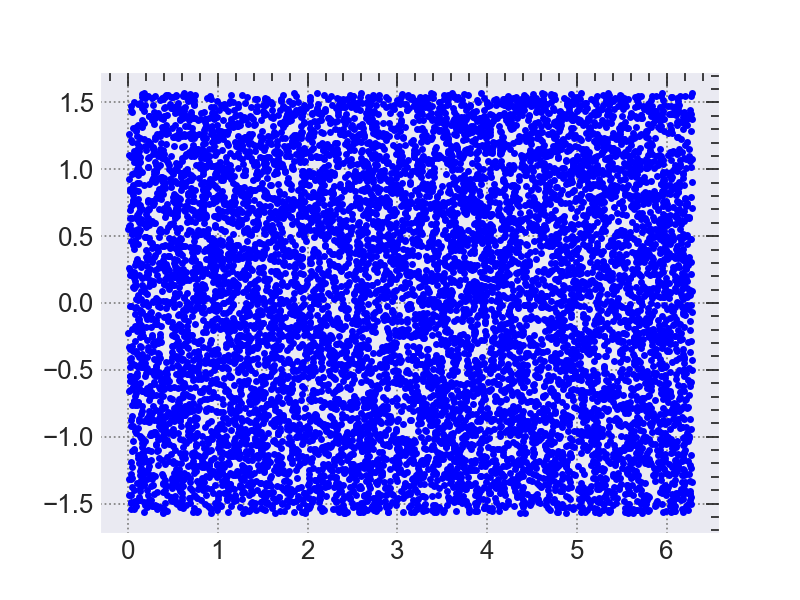

In [33]:
lats, lon = generate(N = 10_000)

In [34]:
%time S2 = separation_matrix_numpy()

CPU times: total: 8.36 s
Wall time: 8.53 s


Portanto, o uso de loops Numpy implícitos acelera o cálculo por um fator de cerca de $6,8/0,02=340$. Como estamos usando as matrizes Numpy eficientes em ambos os casos, a aceleração é inteiramente devida aos loops!

### 3.2 Outros *frameworks*: `PyTorch` e `TensorFlow`

O aprendizado de máquina depende muito de estruturas que copiam o design `Numpy` bem-sucedido para computação de tensor, enquanto adicionam alguns novos recursos importantes:

- Aceleração automática de hardware.
- Cálculo automático de derivadas.
- Implementação eficiente para outras plataformas (móvel, nuvem).

Ao contrário do numpy, o tipo padrão nessas estruturas geralmente é um float de 32 bits, em vez de um float de 64 bits.

As duas estruturas de computação tensor mais populares para aprendizado de máquina hoje são [`PyTorch`](https://pytorch.org) e [`TensorFlow`](https://www.tensorflow.org). Ambos são grandes projetos de código aberto, desenvolvidos principalmente pelo Facebook (`pytorch`) e Google (`tensorflow`). Esses frameworks eram originalmente bem diferentes, com `pytorch` preferido para pesquisa e `tensorflow` preferido para implantação em larga escala, mas eles estão gradualmente convergindo para um conjunto de recursos semelhante.

A seguir, repetimos nosso cálculo da matriz de separação com ambas as estruturas. Você notará que os novos recursos vêm com alguma complexidade adicional.

#### 3.2.1 Exemplo usando o `PyTorch`

In [35]:
import torch

In [36]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
lon_torch = torch.tensor(lon, device = device)
lats_torch = torch.tensor(lats, device = device)

In [37]:
def separation_matrix_torch():
    lat1, lat2 = lats_torch, lats_torch.reshape(-1, 1)
    lon1, lon2 = lon_torch, lon_torch.reshape(-1, 1)
    
    return 2 * torch.asin(torch.sqrt(
        torch.sin(0.5 * (lat2 - lat1)) ** 2 +
        torch.cos(lat1) * torch.cos(lat2) * torch.sin(0.5 * (lon2 - lon1)) ** 2))

In [38]:
%time S3 = separation_matrix_torch()

CPU times: total: 17.7 s
Wall time: 4.92 s


In [39]:
np.allclose(S2, S3.numpy())

True

#### 3.2.2 Exemplo usando o `TensorFlow`

In [40]:
import tensorflow as tf

In [41]:
device = torch.device("GPU:0") if tf.config.list_physical_devices('GPU') else "CPU:0"
with tf.device(device):
    lon_tf = tf.constant(lon)
    lats_tf = tf.constant(lats)

In [42]:
def separation_matrix_tensorflow():
    lat1, lat2 = lats_tf, tf.reshape(lats_tf, [-1, 1])
    lon1, lon2 = lon_tf, tf.reshape(lon_tf, [-1, 1])
    
    return 2 * tf.asin(tf.sqrt(
        tf.sin(0.5 * (lat2 - lat1)) ** 2 +
        tf.cos(lat1) * tf.cos(lat2) * tf.sin(0.5 * (lon2 - lon1)) ** 2))

In [43]:
%time S4 = separation_matrix_tensorflow()

CPU times: total: 35.1 s
Wall time: 6.55 s


In [44]:
np.allclose(S2, S4.numpy())

True

## 4. Aceleração do hardware

A computação de tensores pode ser acelerada significativamente (10-100x) usando hardware que é otimizado para realizar a computação do tensores distribuindo cálculos simples ("*kernels*") entre muitos processadores independentes ("núcleos/*cores*") executados em paralelo.

O driver original para esse hardware era acelerar os cálculos de geometria 3D necessários para renderizar gráficos 3D em tempo real, levando às primeiras [Unidades de Processamento Gráfico (*Graphics Processing Units* ou GPUs)](https://en.wikipedia.org/wiki/Graphics_processing_unit) na década de 1990. Mais recentemente, as GPUs foram adotadas para cálculos puramente numéricos, sem tela anexada, levando ao desenvolvimento de linguagens de programação especializadas, como [CUDA](https://en.wikipedia.org/wiki/CUDA) e [OpenCL](https://en.wikipedia.org/wiki/OpenCL).

Atualmente, um fornecedor (Nvidia) domina o uso de GPUs para ML com sua linguagem CUDA proprietária. O Google também introduziu uma arquitetura [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit) ainda mais especializada.

A tabela abaixo mostra alguns *benchmarks para* o problema da matriz de separação, rodando em diferentes hardwares com diferentes *frameworks*. As acelerações obtidas usando PyTorch e TensorFlow com uma GPU são típicas. As duas estruturas fornecem desempenho geral de GPU comparável, mas podem diferir em problemas específicos.

| Test | Laptop | Server(GPU) | Collab(CPU) | Collab(GPU) |
| --- | --- | --- | --- | --- |
| Numpy | 2.08s | 1.17s | 10.5s | 10.3s |
| Torch | 7.32s	| 48.7ms | --- |	--- |
| Tensorflow | --- | --- | 9.11s | 246ms |
| Ratio | 3.5 |	1/24 |	0.87 | 1/41 |

Para se beneficiar desse hardware, você pode adicionar uma GPU a um servidor Linux ou usar uma plataforma de computação em nuvem.

A computação em nuvem é a maneira mais fácil de começar. Existem algumas opções gratuitas, mas geralmente você precisa "pagar conforme o uso" para fazer uma quantidade útil de trabalho. Alguns bons pontos de partida são:

- [Google Collaboratory](https://colab.research.google.com): ferramenta de pesquisa gratuita com front-end de notebook jupyter.
- [PaperSpace](https://www.paperspace.com): preço razoável e simples de começar.
- [Amazon Web Services](https://aws.amazon.com/pt/ec2/): grátis para experimentar, muito flexível e relativamente complexo.
- [Google Cloud](https://cloud.google.com): comparável à AWS.

**Observação: esta não é uma lista completa e os preços e os recursos estão mudando rapidamente.**

Se você está pensando em construir seu próprio servidor GPU, comece aqui. Um único servidor pode hospedar 4 GPUs. Aqui está uma única [GPU RTX 2080 Ti](https://www.nvidia.com/en-us/geforce/20-series/) refrigerada a água instalada no escritório de um conhecido meu:

![GPU Server](img/GPU-server.jpg)

## 5. Derivadas Automáticas

Além da aceleração de hardware, um recurso importante das estruturas de computação tensorial para ML é sua capacidade de automatizar o cálculo de derivadas, que permitem algoritmos de otimização baseados em gradiente eficientes e precisos.

Em geral, uma derivada pode ser implementada em software de três maneiras:

- Analiticamente (usando papel ou matemática) e depois copiado em código: este é o mais eficiente e preciso, mas menos generalizável.

- Numericamente: com equações de [diferenças finitas](https://en.wikipedia.org/wiki/Finite_difference): esta é a menos eficiente e precisa, mas a mais generalizável.

- [Automaticamente](https://en.wikipedia.org/wiki/Automatic_differentiation): uma abordagem híbrida onde um pequeno conjunto de funções primitivas (sin, cos, log, ...). Isso é eficiente e preciso, mas requer que as expressões sejam construídas inteiramente a partir de primitivas que dão suporte ao AD.

Como exemplo concreto, calcule a distribuição gaussiana (não normalizada):

$$y(x)=e^{-x^{2}}$$

Usando o `PyTorch`:

In [45]:
x = torch.linspace(-5, 5, 20, requires_grad = True)
y = torch.exp(-x**2)
y

tensor([1.3888e-11, 2.0328e-09, 1.7098e-07, 8.2640e-06, 2.2952e-04, 3.6632e-03,
        3.3596e-02, 1.7705e-01, 5.3619e-01, 9.3309e-01, 9.3309e-01, 5.3619e-01,
        1.7705e-01, 3.3596e-02, 3.6632e-03, 2.2952e-04, 8.2640e-06, 1.7098e-07,
        2.0328e-09, 1.3888e-11], grad_fn=<ExpBackward0>)

Especificamos `require_grad = True` para habilitar AD para todos os tensores que dependem de `x` (portanto, apenas `y` neste caso). Para calcular derivadas parciais ("gradientes") de `y` e `x`, basta usar:

In [46]:
y.backward(torch.ones_like(y))

O tensor `x.grad` agora contém $y'(x)$ em cada valor de `x`:

In [47]:
x.grad

tensor([ 1.3888e-10,  1.8188e-08,  1.3498e-06,  5.6543e-05,  1.3288e-03,
         1.7352e-02,  1.2377e-01,  4.6593e-01,  8.4661e-01,  4.9110e-01,
        -4.9110e-01, -8.4661e-01, -4.6593e-01, -1.2377e-01, -1.7352e-02,
        -1.3288e-03, -5.6543e-05, -1.3498e-06, -1.8188e-08, -1.3888e-10])

<IPython.core.display.Javascript object>


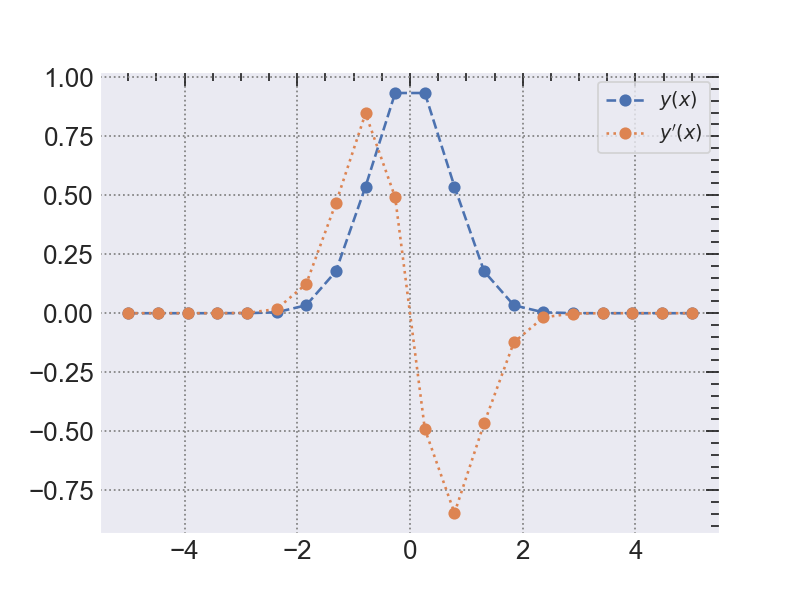

In [48]:
x_n = x.detach().numpy()
yp_n = x.grad.detach().numpy()
y_n = y.detach().numpy()

plt.plot(x_n, y_n, 'o--', label = r'$y(x)$')
plt.plot(x_n, yp_n, 'o:', label = r'$y^\prime(x)$')
plt.legend(loc = 'best')
opt_plot()

Observe que essas derivadas são calculadas com precisão total da máquina e não são afetadas pelo espaçamento aproximado em $x$.

[Jax](https://github.com/google/jax) é uma estrutura relativamente nova para diferenciação automática (desenvolvida pelo Google, mas independente do `TensorFlow`) que se baseia na compilação "*just-in-time*" e é projetada para pesquisa de ML.

## 6. APIs de nível superior para computação tensorial

Embora o `TensorFlow` e o `PyTorch` sejam semelhantes ao Numpy, eles têm APIs diferentes, então você é forçado a escolher um para aproveitar seus recursos exclusivos. No entanto, para muitos cálculos, eles são intercambiáveis e um novo ecossistema de APIs de nível superior está crescendo para oferecer suporte a isso. Por exemplo, confira:

- [Tensorly](http://tensorly.org/stable/index.html) (*Tensor learning in Python*): Inclui [decomposição](https://arxiv.org/abs/1711.10781) poderosa (PCA generalizado) e algoritmos de regressão.

- [Einops](https://github.com/arogozhnikov/einops) (*Deep learning operations reinvented*): Suporta expressões compactas para operações de indexação complexas ([`np.einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) com esteróides).

Nenhum desses pacotes está incluído no ambiente MLS conda, mas encorajo você a experimentá-los se quiser escrever código tensorial independente de estrutura.

![image](https://c.tenor.com/hEOM8E4epvgAAAAC/hahaha-thats-all-folks.gif)

---

## Para se divertir!

- [Lista de problemas #02](https://github.com/GabrielWendell/Intro_ML/blob/main/Listas/Problemas2.ipynb)

---